In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [4]:
df= pd.read_csv("accent-mfcc-data-1.csv")

In [5]:
df_copy=df.copy()

In [6]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [7]:
y= df['language']

In [8]:
y

0      ES
1      ES
2      ES
3      ES
4      ES
       ..
324    US
325    US
326    US
327    US
328    US
Name: language, Length: 329, dtype: object

In [9]:
# Encode the accent labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [10]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [12]:
# training and testing
feature_cols=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12']
#feature_inst=['language_ES','language_FR','language_GE','language_IT','language_UK','language_US']
x=df[feature_cols]
#y=df[feature_inst]

In [13]:
x_train,x_test,y_train, y_test= train_test_split(x,y_encoded, test_size=0.2, random_state=1)

In [15]:
from sklearn.svm import SVC

In [17]:
svm_model= SVC(kernel='linear',C=1.0, random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
y_pred = svm_model.predict(x_test)

In [19]:
y_pred

array([1, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 4, 3, 2, 5, 0, 5, 5, 5, 4,
       5, 5, 0, 5, 0, 5, 5, 5, 4, 2, 5, 3, 3, 5, 5, 5, 5, 5, 4, 0, 0, 4,
       5, 5, 2, 5, 2, 2, 3, 5, 5, 1, 4, 4, 5, 2, 2, 3, 5, 5, 3, 5, 5, 3])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7727272727272727


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[ 5  0  0  0  0  1]
 [ 0  1  1  0  0  0]
 [ 0  0  3  1  0  1]
 [ 0  0  2  5  0  3]
 [ 0  0  1  2  6  0]
 [ 0  1  0  1  1 31]]


In [23]:
n_classes=6

In [24]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

In [25]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred==i)
    roc_auc[i] = auc(fpr[i], tpr[i])

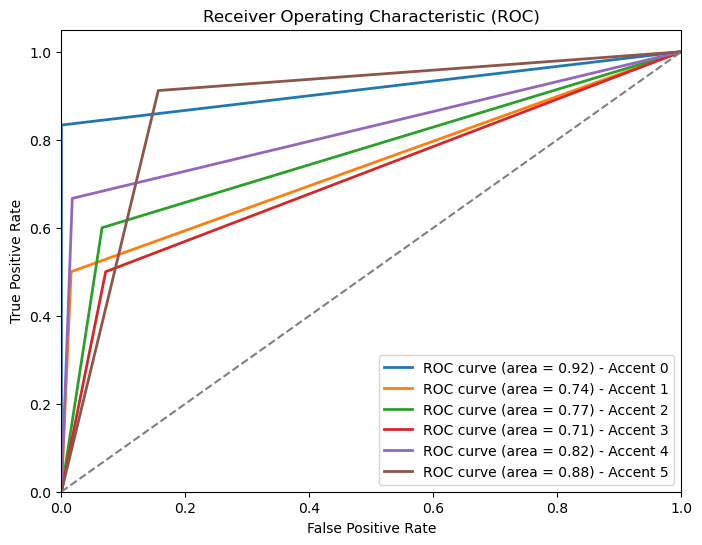

In [26]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(6):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) - Accent %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()